In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import torch

In [8]:
# %load C:/Users/Spurius/Desktop/handout/local_autograder/hw1/hw1.py
"""
Follow the instructions provided in the writeup to completely
implement the class specifications for a basic MLP, optimizer, .
You will be able to test each section individually by submitting
to autolab after implementing what is required for that section
-- do not worry if some methods required are not implemented yet.

Notes:

The __call__ method is a special reserved method in
python that defines the behaviour of an object when it is
used as a function. For example, take the Linear activation
function whose implementation has been provided.

# >>> activation = Identity()
# >>> activation(3)
# 3
# >>> activation.forward(3)
# 3
"""

# Do not import any additional 3rd party external libraries as they will not
# be available to AutoLab and are not needed (or allowed)
import numpy as np
import os


class Activation(object):

    """
    Interface for activation functions (non-linearities).

    In all implementations, the state attribute must contain the result, i.e. the output of forward (it will be tested).
    """

    # No additional work is needed for this class, as it acts like an abstract base class for the others

    def __init__(self):
        self.state = None

    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        raise NotImplemented

    def derivative(self):
        raise NotImplemented


class Identity(Activation):

    """
    Identity function (already implemented).
    """

    # This class is a gimme as it is already implemented for you as an example

    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        self.state = x
        return x

    def derivative(self):
        return 1.0


class Sigmoid(Activation):

    """
    Sigmoid non-linearity
    """

    # Remember do not change the function signatures as those are needed to stay the same for AL

    def __init__(self):
        super(Sigmoid, self).__init__()

    def forward(self, x):
        self.state = 1 / (1 + np.exp(-x))
        return self.state

    def derivative(self):
        return self.state * (1 - self.state)


class Tanh(Activation):

    """
    Tanh non-linearity
    """

    # This one's all you!

    def __init__(self):
        super(Tanh, self).__init__()

    def forward(self, x):
        self.state = np.tanh(x)
        return self.state

    def derivative(self):
        return 1 - self.state ** 2


class ReLU(Activation):

    """
    ReLU non-linearity
    """

    def __init__(self):
        super(ReLU, self).__init__()

    def forward(self, x):
        self.state = x * (x >= 0)
        return self.state

    def derivative(self):
        self.state = 1 * (self.state > 0)
        return self.state
        # raise NotImplemented

# Ok now things get decidedly more interesting. The following Criterion class
# will be used again as the basis for a number of loss functions (which are in the
# form of classes so that they can be exchanged easily (it's how PyTorch and other
# ML libraries do it))


class Criterion(object):

    """
    Interface for loss functions.
    """

    # Nothing needs done to this class, it's used by the following Criterion classes

    def __init__(self):
        self.logits = None
        self.labels = None
        self.loss = None

    def __call__(self, x, y):
        return self.forward(x, y)

    def forward(self, x, y):
        raise NotImplemented

    def derivative(self):
        raise NotImplemented


class SoftmaxCrossEntropy(Criterion):

    """
    Softmax loss
    """

    def __init__(self):

        super(SoftmaxCrossEntropy, self).__init__()
        self.sm = None

    def forward(self, x, y):

        self.logits = x
        self.labels = y
        exps = np.exp(x - np.max(x))
        self.sm = exps / np.sum(exps)

        self.loss = -np.sum(np.sum(y * np.log(x)))


    def derivative(self):

        return self.sm

        # raise NotImplemented


class BatchNorm(object):

    def __init__(self, fan_in, alpha=0.9):

        # You shouldn't need to edit anything in init

        self.alpha = alpha
        self.eps = 1e-8
        self.x = None
        self.norm = None
        self.out = None

        # The following attributes will be tested
        self.var = np.ones((1, fan_in))
        self.mean = np.zeros((1, fan_in))

        self.gamma = np.ones((1, fan_in))
        self.dgamma = np.zeros((1, fan_in))

        self.beta = np.zeros((1, fan_in))
        self.dbeta = np.zeros((1, fan_in))

        # inference parameters
        self.running_mean = np.zeros((1, fan_in))
        self.running_var = np.ones((1, fan_in))

    def __call__(self, x, eval=False):
        return self.forward(x, eval)

    def forward(self, x, eval=False):

         if eval:
                

        self.x = x

        # self.mean = # ???
        # self.var = # ???
        # self.norm = # ???
        # self.out = # ???

        # update running batch statistics
        # self.running_mean = # ???
        # self.running_var = # ???

        # ...

        raise NotImplemented

    def backward(self, delta):

        raise NotImplemented


# These are both easy one-liners, don't over-think them
def random_normal_weight_init(d0, d1):
    raise NotImplemented


def zeros_bias_init(d):
    


class MLP(object):

    """
    A simple multilayer perceptron
    """

    def __init__(self, input_size, output_size, hiddens, activations, weight_init_fn, bias_init_fn, criterion, lr, momentum=0.0, num_bn_layers=0):

        # Don't change this -->
        self.train_mode = True
        self.num_bn_layers = num_bn_layers
        self.bn = num_bn_layers > 0
        self.nlayers = len(hiddens) + 1
        self.input_size = input_size
        self.output_size = output_size
        self.activations = activations
        self.criterion = criterion
        self.lr = lr
        self.momentum = momentum
        # <---------------------

        # Don't change the name of the following class attributes,
        # the autograder will check against these attributes. But you will need to change
        # the values in order to initialize them correctly
        self.W = np.ones(input_size, output_size)
        self.dW = None
        self.b = np.zeros(output_size)
        self.db = None
        # HINT: self.foo = [ bar(???) for ?? in ? ]

        # if batch norm, add batch norm parameters
        if self.bn:
            self.bn_layers = None

        # Feel free to add any other attributes useful to your implementation (input, output, ...)
        self.output = None
        self.grads = {}

    def forward(self, x):
        self.output = np.dot(x, self.W) + self.b
        return self.output

    def zero_grads(self):
        self.grads.clear()

    def step(self):
        raise NotImplemented

    def backward(self, labels):
        self.dW = 0

    def __call__(self, x):
        return self.forward(x)

    def train(self):
        self.train_mode = True

    def eval(self):
        self.train_mode = False


def get_training_stats(mlp, dset, nepochs, batch_size):

    train, val, test = dset
    trainx, trainy = train
    valx, valy = val
    testx, testy = test

    idxs = np.arange(len(trainx))

    training_losses = []
    training_errors = []
    validation_losses = []
    validation_errors = []

    # Setup ...

    for e in range(nepochs):

        # Per epoch setup ...

        for b in range(0, len(trainx), batch_size):

            pass  # Remove this line when you start implementing this
            # Train ...

        for b in range(0, len(valx), batch_size):

            pass  # Remove this line when you start implementing this
            # Val ...

        # Accumulate data...

    # Cleanup ...

    for b in range(0, len(testx), batch_size):

        pass  # Remove this line when you start implementing this
        # Test ...

    # Return results ...

    # return (training_losses, training_errors, validation_losses, validation_errors)

    raise NotImplemented


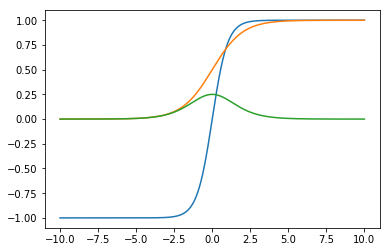

In [20]:
x = np.linspace(-10, 10, 1000)
y = np.tanh(x)
ex = Sigmoid()

plt.plot(x, y)
plt.plot(x, ex(x))
plt.plot(x, ex.derivative())
plt.show()

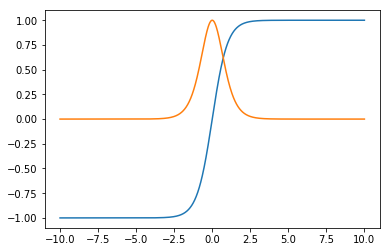

In [21]:
tan = Tanh()
# plt.plot(x, y)
plt.plot(x, tan(x))
plt.plot(x, tan.derivative())
plt.show()

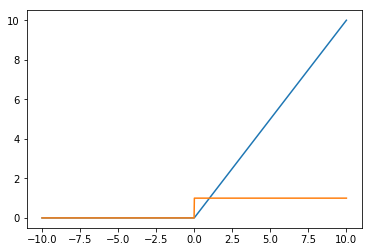

In [34]:
rel = ReLU()
# plt.plot(x, y)
plt.plot(x, rel(x))
plt.plot(x, rel.derivative())
plt.show()

C:\Users\Spurius\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:174: RuntimeWarning: invalid value encountered in log


ValueError: x, y, and format string must not be None

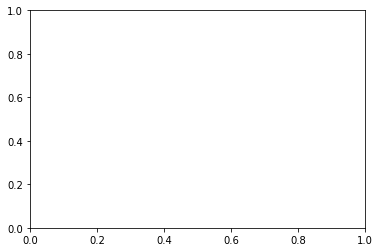

In [36]:
cross = SoftmaxCrossEntropy()
plt.plot(x, cross(x, y))

In [2]:
# %load C:/Users/Spurius/Desktop/handout/local_autograder/runner.py
import argparse
import json
import os
import re
import sys
import pytest
import six
import time

sys.path.append(os.path.dirname(os.path.abspath(__file__)))
from problems import problems


class LoggerPlugin(object):
    def __init__(self):
        self.logs = {}

    def pytest_runtest_logreport(self, report):
        if report.when == 'call':
            name = re.split('::', report.nodeid)[1]
            passed = 1 if report.outcome == 'passed' else 0
            self.logs[name] = passed


def main(argv):


    parser = argparse.ArgumentParser(description='Test Runner')
    default_module_path = '../solution/gold'
    parser.add_argument('--module-path', type=str, default=default_module_path,
                        help='output directory (default: {})'.format(default_module_path))
    args = parser.parse_args(argv[1:])
    sys.path.append(args.module_path)
    test_path = os.path.dirname(os.path.abspath(__file__))
    logger = LoggerPlugin()

    start = time.time()
    pytest.main(["-s","-qq", test_path], plugins=[logger])
    end = time.time()
    print("Run time: ", end - start)

    scores = {}
    total = 0
    for k, v in six.iteritems(logger.logs):
        problem, value = problems[k]
        if problem not in scores:
            scores[problem] = 0
        scores[problem] += value * v
        total += value * v
    print(json.dumps({'scores': scores}))
    # print("max score: {}".format(total))

if __name__ == '__main__':
    main(sys.argv)


NameError: name '__file__' is not defined

In [3]:
def test_mystery_hidden_forward3():
    data = saved_data[15]
    x = data[0]
    gt = data[1]
    reset_prng()
    mlp = hw1.MLP(784, 10, [32], [hw1.Sigmoid(), hw1.Identity()],
                  weight_init, bias_init, hw1.SoftmaxCrossEntropy(), 0.008,
                 momentum=0.0, num_bn_layers=0)

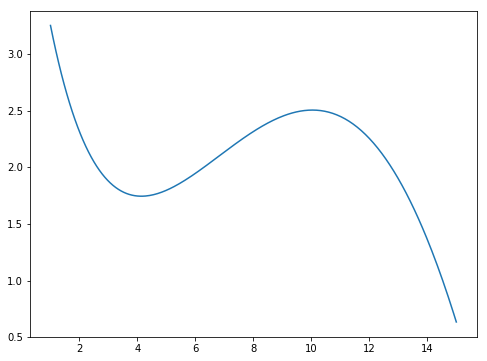

In [118]:
x = np.linspace(1, 15, 300)
y = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
plt.figure(figsize=(8, 6))
plt.plot(x, y)

In [7]:
-np.log(0.98)

0.020202707317519466